# Tarea 5. Construyendo la frontera de mínima varianza para dos activos.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/08/Pareto_Efficient_Frontier_for_the_Markowitz_Portfolio_selection_problem..png" width="600px" height="400px" />

**Resumen.**
> En esta tarea, construirás la frontera de mínima varianza para dos activos riesgosos usando los datos de mercados internacionales que usamos en la clase 10.

> Construirás portafolios que consisten de dos activos riesgosos, graficarás la frontera de mínima varianza y encontrarás el portafolio de mínima varianza. Repetirás luego el ejercicio para otro par de activos y compararás los beneficios de diversificación en cada caso.

> Por favor, revisar la clase 10 para los datos. 

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea5_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea5_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Datos (10 puntos)

Copiar y pegar los datos de rendimientos esperados, volatilidades y correlaciones de mercados internacionales brindados en la Clase 9.

1. Mostrar los DataFrame con los datos (5 puntos).
2. Graficar en el espacio de rendimiento esperado contra volatilidad cada uno de los activos (5 puntos).

In [72]:
# Importamos pandas y numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
# Resumen en base anual de rendimientos esperados y volatilidades
annual_ret_summ = pd.DataFrame(columns=['EU', 'RU', 'Francia', 'Alemania', 'Japon'], index=['Media', 'Volatilidad'])
annual_ret_summ.loc['Media'] = np.array([0.1355, 0.1589, 0.1519, 0.1435, 0.1497])
annual_ret_summ.loc['Volatilidad'] = np.array([0.1535, 0.2430, 0.2324, 0.2038, 0.2298])

annual_ret_summ.round(4)

,EU,RU,Francia,Alemania,Japon
Media,0.1355,0.1589,0.1519,0.1435,0.1497
Volatilidad,0.1535,0.243,0.2324,0.2038,0.2298


In [74]:
# Matriz de correlación
corr = pd.DataFrame(data= np.array([[1.0000, 0.5003, 0.4398, 0.3681, 0.2663],
                                    [0.5003, 1.0000, 0.5420, 0.4265, 0.3581],
                                    [0.4398, 0.5420, 1.0000, 0.6032, 0.3923],
                                    [0.3681, 0.4265, 0.6032, 1.0000, 0.3663],
                                    [0.2663, 0.3581, 0.3923, 0.3663, 1.0000]]),
                    columns=annual_ret_summ.columns, index=annual_ret_summ.columns)
corr.round(4)

,EU,RU,Francia,Alemania,Japon
EU,1.0000,0.5003,0.4398,0.3681,0.2663
RU,0.5003,1.0000,0.5420,0.4265,0.3581
Francia,0.4398,0.5420,1.0000,0.6032,0.3923
Alemania,0.3681,0.4265,0.6032,1.0000,0.3663
Japon,0.2663,0.3581,0.3923,0.3663,1.0000


In [75]:
# Activos
E1 = annual_ret_summ.loc['Media','EU']
E2 = annual_ret_summ.loc['Media','RU']
E3 = annual_ret_summ.loc['Media','Francia']
E4 = annual_ret_summ.loc['Media','Alemania']
E5 = annual_ret_summ.loc['Media','Japon']
# Volatilidades individuales
s1 = annual_ret_summ.loc['Volatilidad','EU']
s2 = annual_ret_summ.loc['Volatilidad','RU']
s3 = annual_ret_summ.loc['Volatilidad','Francia']
s4 = annual_ret_summ.loc['Volatilidad','Alemania']
s5 = annual_ret_summ.loc['Volatilidad','Japon']

Text(0, 0.5, 'Rendimiento Esperado $\\E[r]')

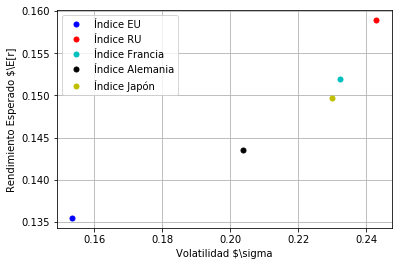

In [76]:

plt.plot(s1, E1, 'ob', ms=5, label='Índice EU')
plt.plot(s2, E2, 'or', ms=5, label='Índice RU')
plt.plot(s3, E3, 'oc', ms=5, label='Índice Francia')
plt.plot(s4, E4, 'ok', ms=5, label='Índice Alemania')
plt.plot(s5, E5, 'oy', ms=5, label='Índice Japón')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Volatilidad $\sigma')
plt.ylabel('Rendimiento Esperado $\E[r]')

## 2. Portafolios con Japón y Reino Unido (30 puntos)

Usando los datos del punto anterior:

1. Construya la frontera de mínima varianza que representa las posibles combinaciones de portafolios que se pueden crear con los mercados Japoneses y del Reino Unido como activos riesgosos. Puedes pensar en ellos como índices de mercado. Reportar los rendimientos esperados y las volatilidades de estos portafolios en un DataFrame (15 puntos).
2. Encontrar los pesos del portafolio de mínima varianza. ¿Cuáles son el rendimiento esperado y volatilidad del portafolio de mínima varianza? (15 puntos).

In [77]:
# Vector de w variando entre 0 y 1 con N pasos
N = 101
w = np.linspace(0, 1, N)
# Rendimientos esperados individuales
# Activo1: RU, Activo2:Japon
E1 = annual_ret_summ.loc['Media','RU']
E2 = annual_ret_summ.loc['Media','Japon']
# Volatilidades individuales
s1 = annual_ret_summ.loc['Volatilidad','RU']
s2 = annual_ret_summ.loc['Volatilidad','Japon']
# Correlacion
r12 = corr.loc['RU', 'Japon']
# Covarianza
s12 = s1 * s2 * r12

In [78]:
# Crear un DataFrame cuyas columnas sean rendimiento esperado
# y volatilidad del portafolio para cada una de las w
# generadas
portafolios2 = pd.DataFrame(data={'w' : w,
                                 'Media' : w * E1 + (1 - w) * E2,
                                 'Volatilidad' : ((w * s1)**2 + ((1-w)*s2)**2 + 2 * w * (1 - w) * s12)**0.5})

In [79]:
portafolios2.head()

,w,Media,Volatilidad
0,0.00,0.149700,0.229800
1,0.01,0.149792,0.228383
2,0.02,0.149884,0.226990
3,0.03,0.149976,0.225619
4,0.04,0.150068,0.224272


In [80]:
portafolios2.tail()

,w,Media,Volatilidad
96,0.96,0.158532,0.236727
97,0.97,0.158624,0.238266
98,0.98,0.158716,0.239824
99,0.99,0.158808,0.241402
100,1.00,0.158900,0.243000


In [81]:
# Calcular w_minvar y mostrar...
w_minvar = (s2**2 - s12) / (s1**2 + s2**2 - 2*s12)
w_minvar, 1-w_minvar

(0.4565776358082657, 0.5434223641917343)

In [82]:
E_minvar = E1 * w_minvar + E2 * (1 - w_minvar)
s_minvar = ((w_minvar * s1)**2 + ((1-w_minvar)*s2)**2 + 2 * w_minvar * (1 - w_minvar) * s12)**0.5
#s_minvar equivalente a var2(w_minvar, s1, s2, s12)**0.5
E_minvar, s_minvar

(0.15390051424943607, 0.19449206680733014)

$E[r] = 15.39\%$ y $\sigma = 19.44\%$

## 3. Mismos activos, distinta correlación (30 puntos)

En este punto se usarán los mismos activos (Japón y Reino Unido) con sus rendimientos esperados y volatilidades, solo que supondremos que el coeficiente de correlación entre sus rendimiento es de 0.5.

1. Nuevamente, construya la frontera de mínima varianza para estos dos activos con el nuevo supuesto de correlación. Reportar los rendimientos esperados y las volatilidades de estos portafolios en un DataFrame (15 puntos).
2. Encontrar los pesos del portafolio de mínima varianza. ¿Cuáles son el rendimiento esperado y volatilidad del portafolio de mínima varianza? (15 puntos).

In [83]:
# Vector de w variando entre 0 y 1 con N pasos
N = 101
w = np.linspace(0, 1, N)
# Rendimientos esperados individuales
# Activo1: RU, Activo2:Japon
E3 = annual_ret_summ.loc['Media','RU']
E4 = annual_ret_summ.loc['Media','Japon']
# Volatilidades individuales
s3 = annual_ret_summ.loc['Volatilidad','RU']
s4 = annual_ret_summ.loc['Volatilidad','Japon']
# Correlacion
r34 = 0.5
# Covarianza
s34 = s3 * s4 * r34

In [84]:
# Crear un DataFrame cuyas columnas sean rendimiento esperado
# y volatilidad del portafolio para cada una de las w
# generadas
portafolios3 = pd.DataFrame(data={'w' : w,
                                 'Media' : w * E3 + (1 - w) * E4,
                                 'Volatilidad' : ((w * s3)**2 + ((1-w)*s4)**2 + 2 * w * (1 - w) * s34)**0.5})

In [85]:
portafolios3.head()

,w,Media,Volatilidad
0,0.00,0.149700,0.229800
1,0.01,0.149792,0.228727
2,0.02,0.149884,0.227673
3,0.03,0.149976,0.226639
4,0.04,0.150068,0.225625


In [86]:
portafolios3.tail()

,w,Media,Volatilidad
96,0.96,0.158532,0.238009
97,0.97,0.158624,0.239232
98,0.98,0.158716,0.240471
99,0.99,0.158808,0.241727
100,1.00,0.158900,0.243000


In [87]:
# Calcular w_minvar y mostrar...
w_minvar2 = (s4**2 - s34) / (s3**2 + s4**2 - 2*s34)
w_minvar2, 1-w_minvar2


(0.4442927011099044, 0.5557072988900956)

In [88]:
E_minvar2 = E3 * w_minvar2 + E4 * (1 - w_minvar2)
s_minvar2 = ((w_minvar2 * s3)**2 + ((1-w_minvar2)*s4)**2 + 2 * w_minvar2 * (1 - w_minvar2) * s34)**0.5
#s_minvar equivalente a var2(w_minvar, s1, s2, s12)**0.5
E_minvar2, s_minvar2

(0.15378749285021112, 0.2043300675083318)

$E[r] = 15.37\%$ y $\sigma = 20.43\%$

## 4. Gráficos y conclusiones (30 puntos)

1. Usando sus respuestas para los puntos 2 y 3, grafique las dos fronteras encontradas en una sola gráfica, además de los puntos correspondientes a los activos individuales, donde el eje $x$ es la volatilidad y el eje $y$ el rendimiento esperado. Asegúrese de etiquetar todo y poner distintos colores para diferenciar los distintos elementos en su gráfico (15 puntos).
2. Concluya acerca de la gráfica de las dos fronteras de mínima varianza. ¿Cuál provee más diversificación?, ¿cómo se diferencian?, ¿son diferentes los pesos de los dos portafolios de varianza mínima en cada caso?, ¿cómo puede explicar esta diferencia? (15 puntos).

Text(0, 0.5, 'Rendimiento Esperado $\\E[r]')

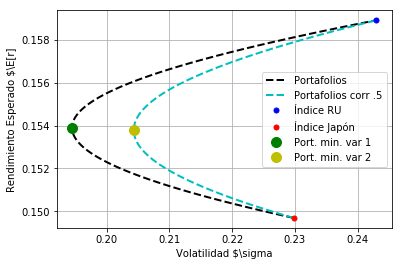

In [92]:
# Graficar el portafolio de varianza mínima
# sobre el mismo gráfico realizado anteriormente
plt.figure(figsize=(6,4))
plt.plot(portafolios2['Volatilidad'], portafolios2['Media'], '--k', lw = 2, label = 'Portafolios')
plt.plot(portafolios3['Volatilidad'], portafolios2['Media'], '--c', lw = 2, label = 'Portafolios corr .5')
plt.plot(s1, E1, 'ob', ms=5, label='Índice RU')
plt.plot(s2, E2, 'or', ms=5, label='Índice Japón')
plt.plot(s_minvar, E_minvar, 'og', ms=10, label='Port. min. var 1')
plt.plot(s_minvar2, E_minvar2, 'oy', ms=10, label='Port. min. var 2')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Volatilidad $\sigma')
plt.ylabel('Rendimiento Esperado $\E[r]')

¿Cuál provee más diversificación?, ¿cómo se diferencian?, ¿son diferentes los pesos de los dos portafolios de varianza mínima en cada caso?, ¿cómo puede explicar esta diferencia? (15 puntos).

El primer portafolio provee más diversificación porque están menos correlacionados los activos, al segundo le pusimos 0.5 de correlación artificialmente, entonces nos quitó diversificación y añadió riesgo. Tiene mayor volatilidad y un rendimiento un poco menor el segundo portafolio de mínima varianza, debido a lo mencionado previamente. Podemos confirmar que para poder diversificar exitosamente, tenemos que buscar activos que estén lo menor correlacionados posibles, de manera que logremos evitar lo más que se pueda el riesgo idiosincrático

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>